Support Vector machine

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
data=pd.read_csv('https://raw.githubusercontent.com/ygtech27/Datasets/refs/heads/main/mushroom.csv')
data
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

,0
Unnamed: 0,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0


In [4]:
from sklearn.preprocessing import LabelEncoder
cat_cols=data.select_dtypes(include=['object']).columns
label=LabelEncoder()
for col in cat_cols:
    if data[col].dtypes=='object':
        data[col]=label.fit_transform(data[col])
data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,1037,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,309,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,282,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,820,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,4,2,0,1,4,0,1,1,3,...,0,1,1,2,6,0,1,1,5.877891,17.464145
1996,1160,4,2,5,1,5,0,2,1,9,...,0,2,1,7,8,2,5,1,6.500840,13.501957
1997,265,2,1,3,1,3,3,0,1,7,...,0,0,2,1,8,0,6,1,13.558064,11.270020
1998,411,0,3,7,0,7,2,0,1,6,...,1,3,1,0,1,5,6,1,11.092703,8.423199


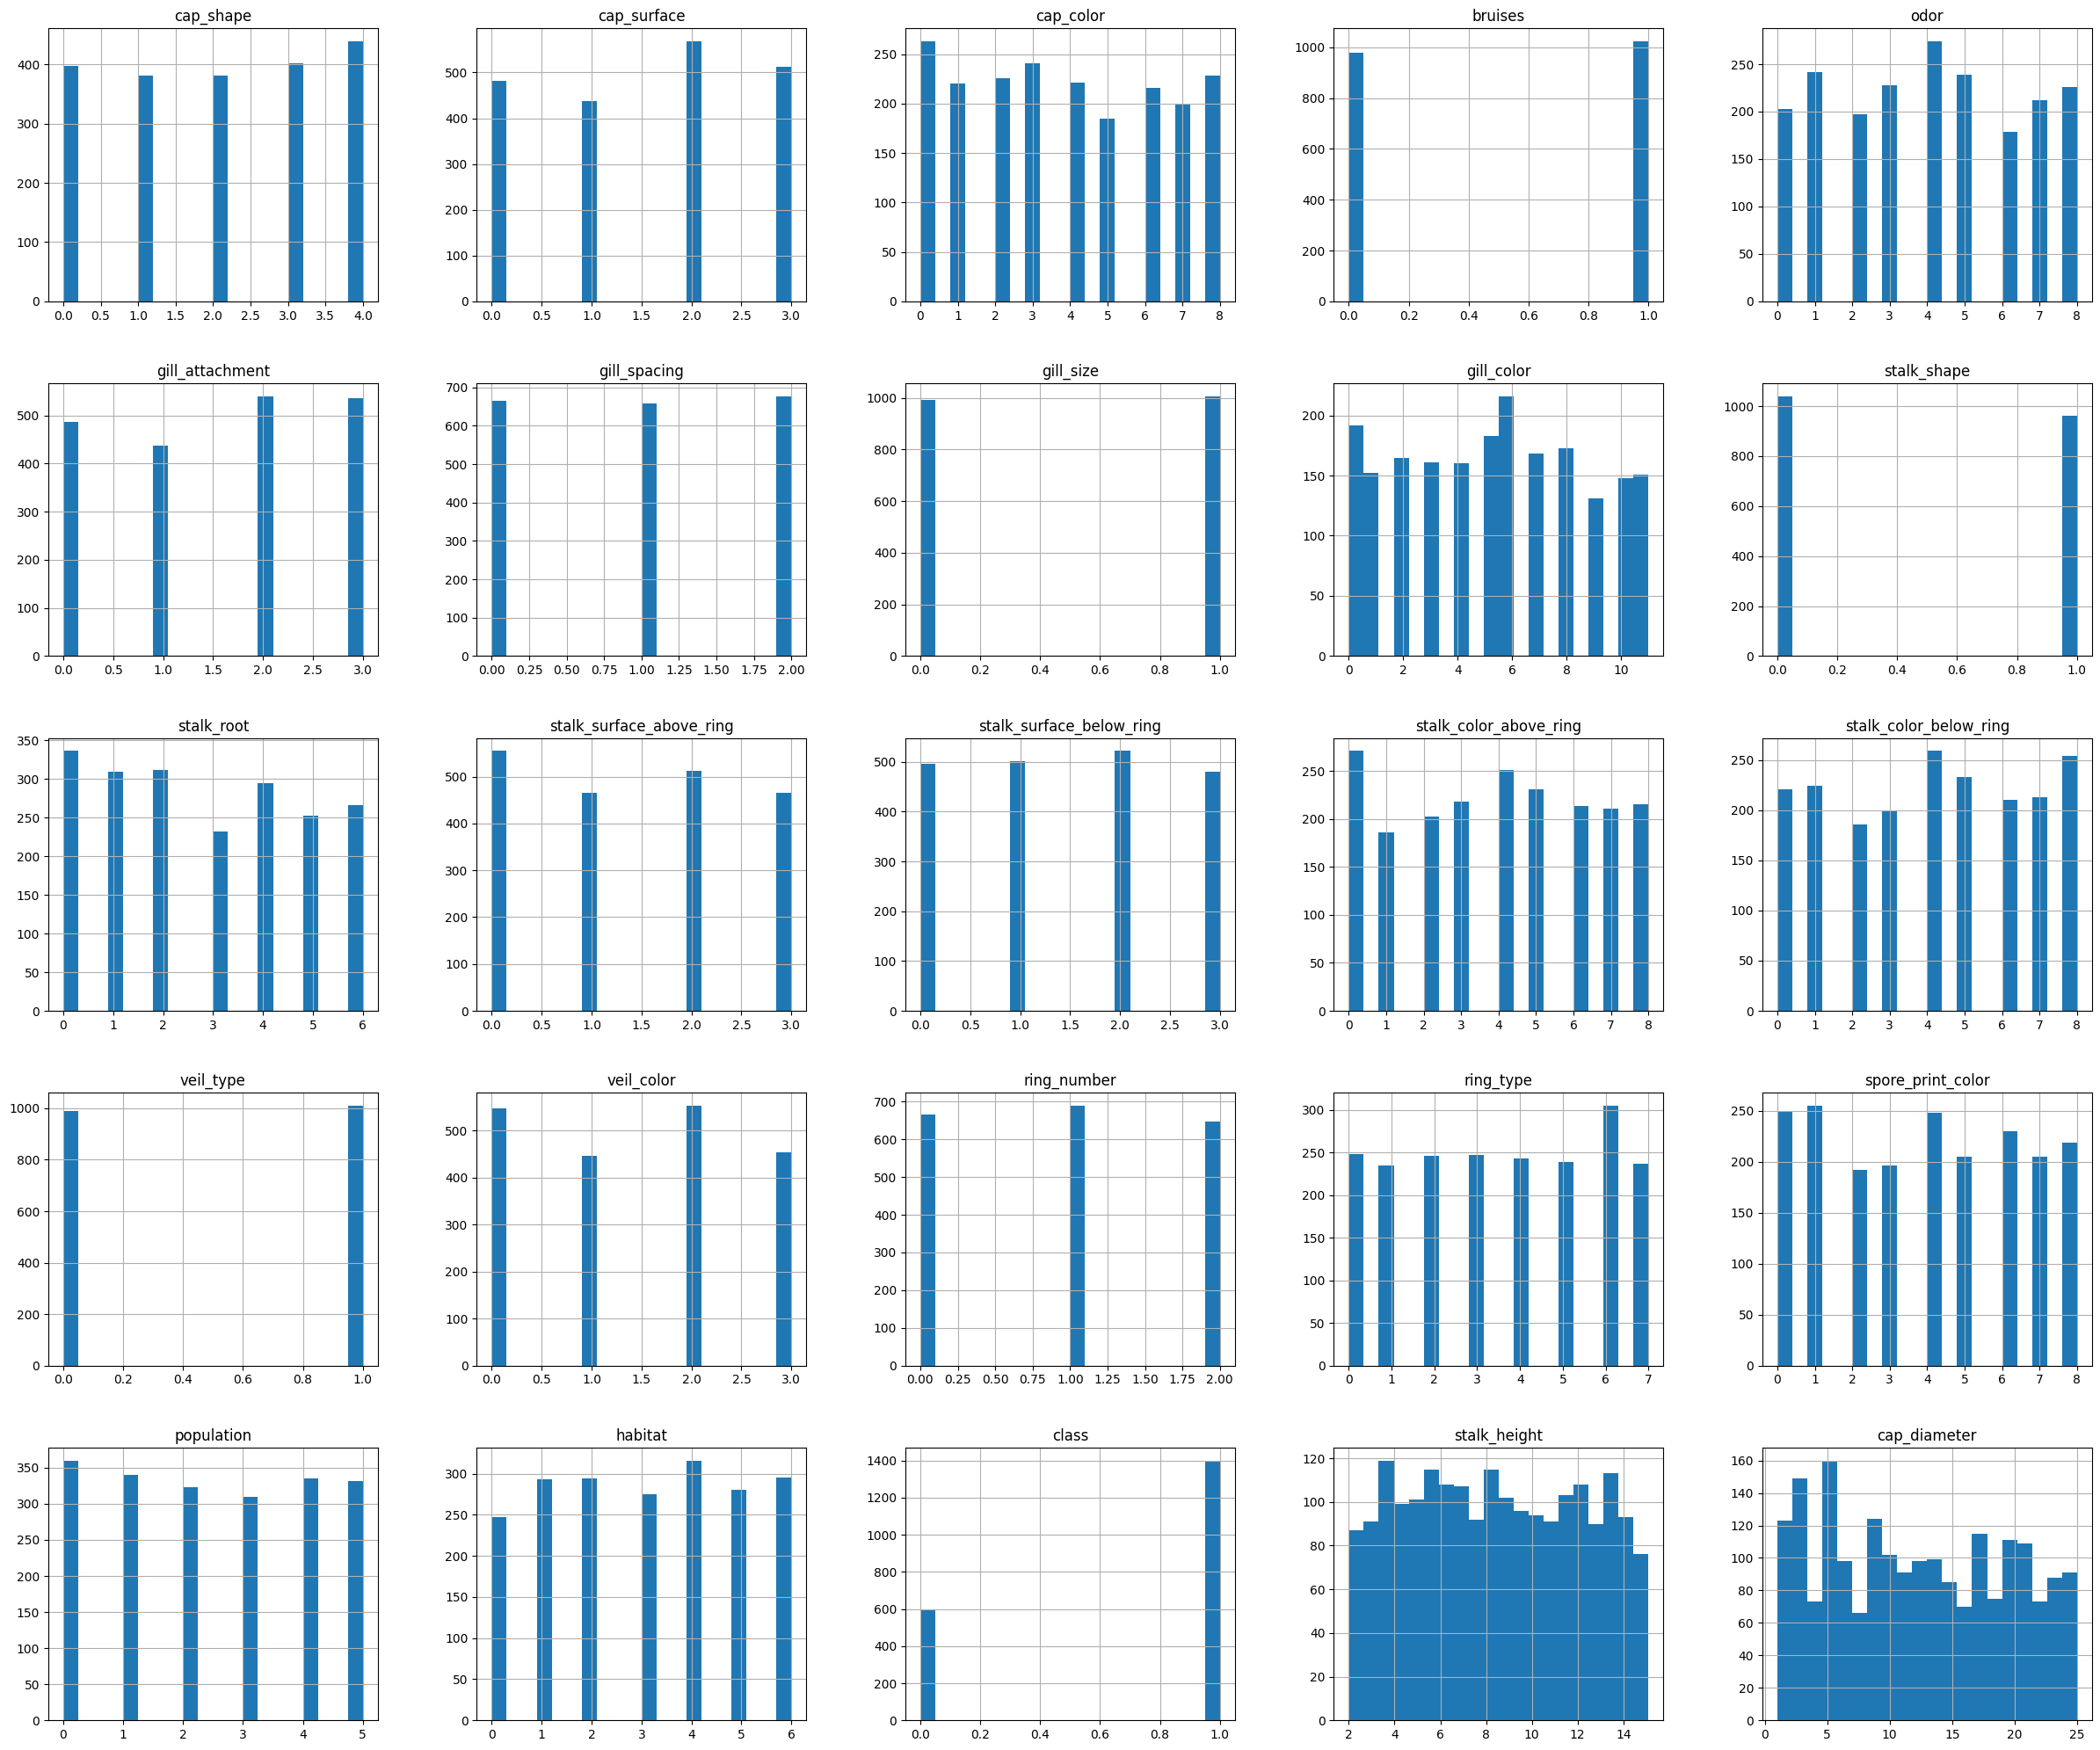

In [5]:
data.drop('Unnamed: 0',axis=1,inplace=True)
data.hist(bins=20,figsize=(30,25))
plt.show()

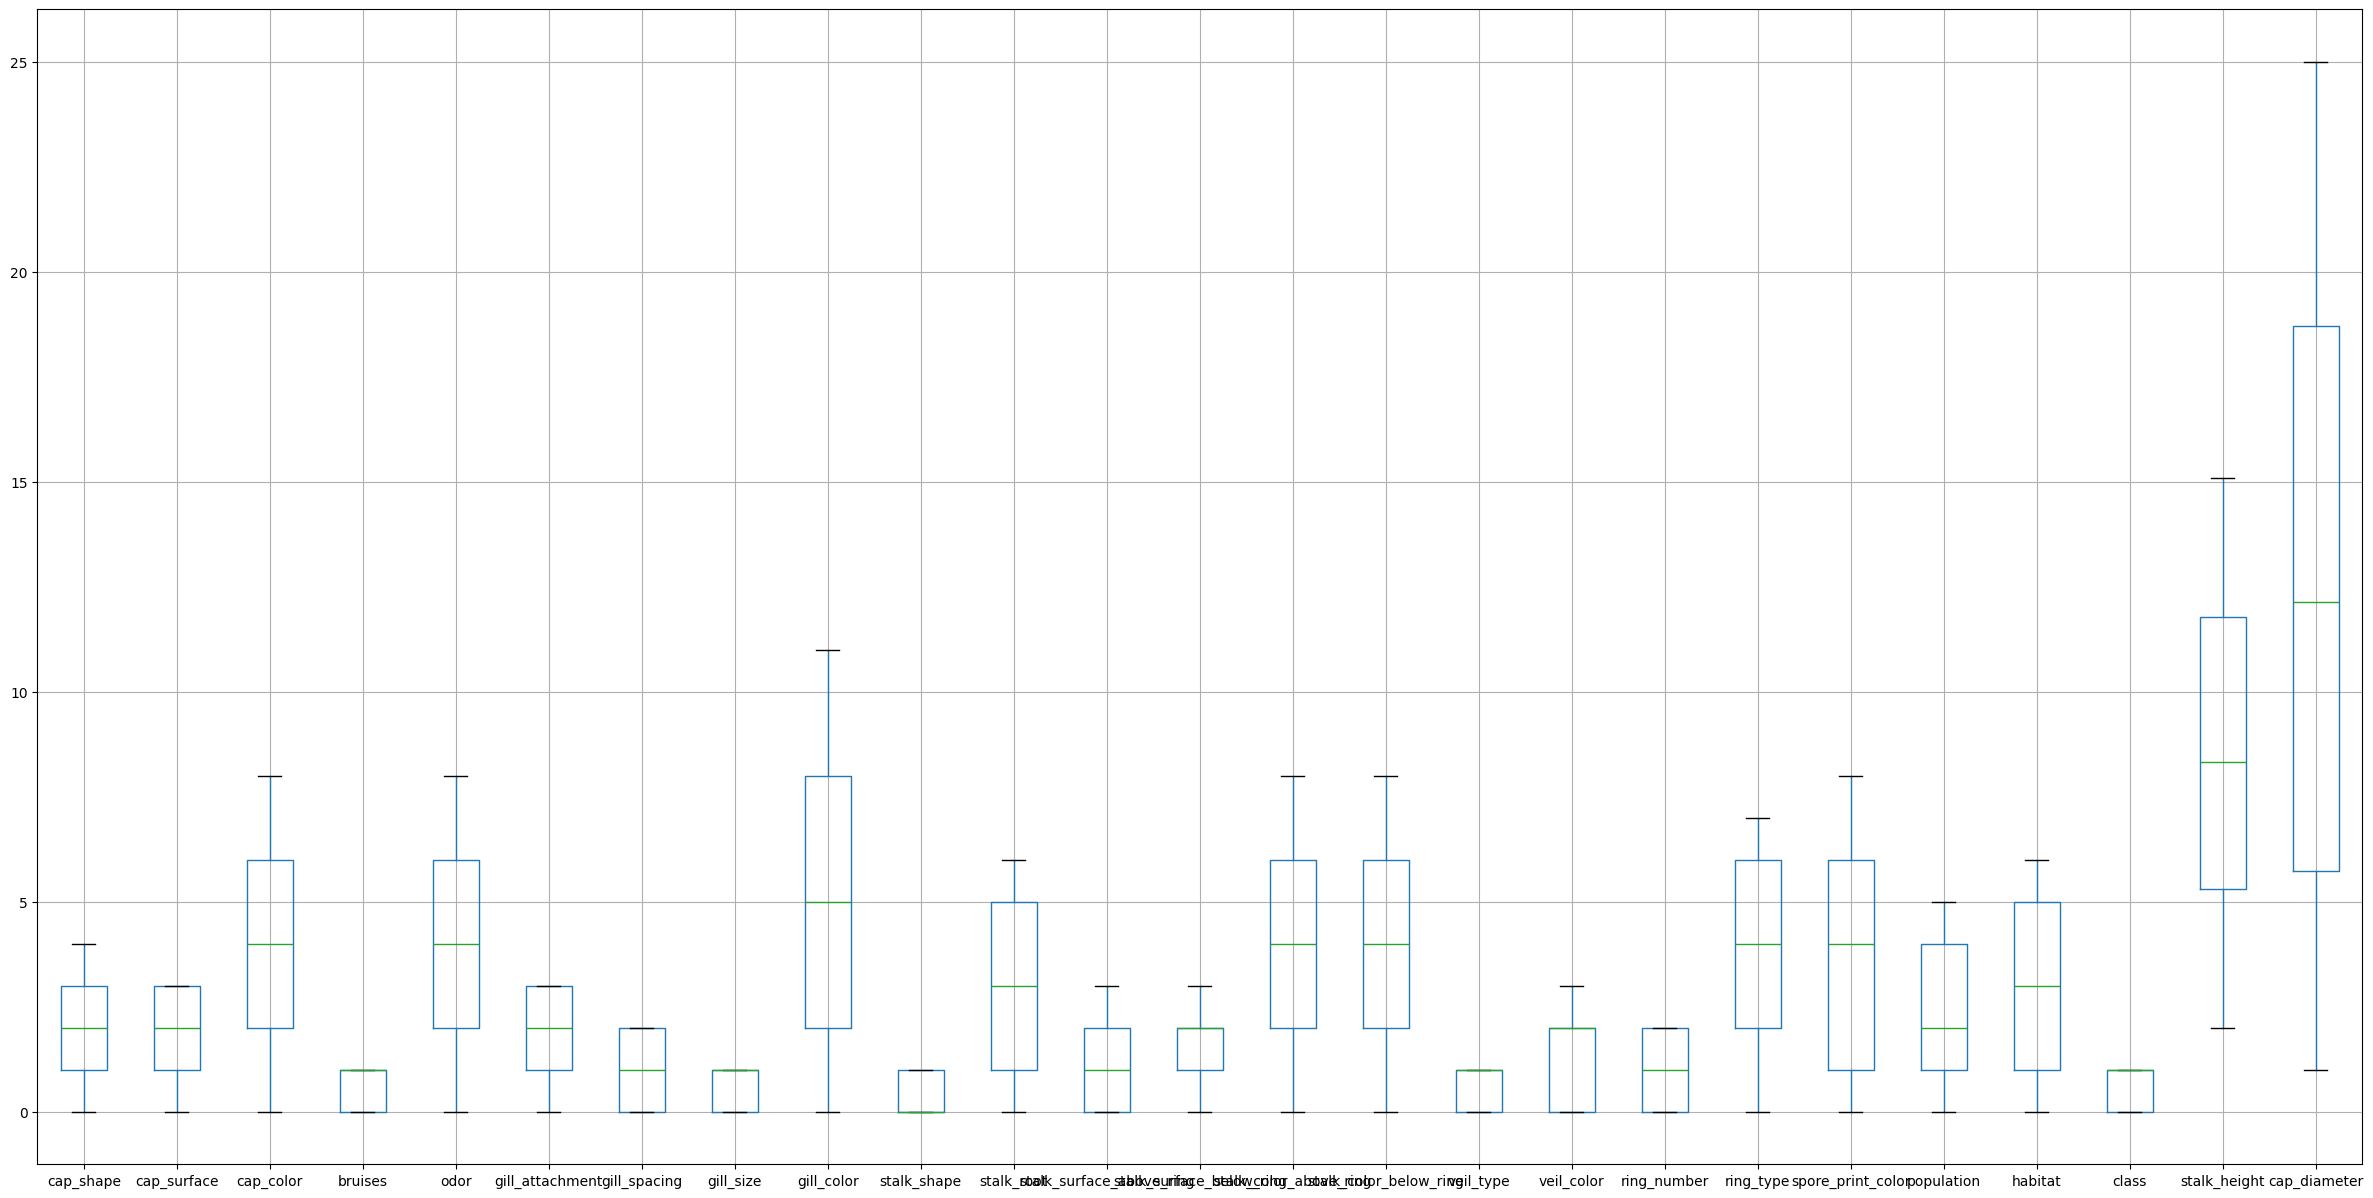

In [6]:
plt.figure(figsize=(30,15))
data.boxplot()
plt.show()

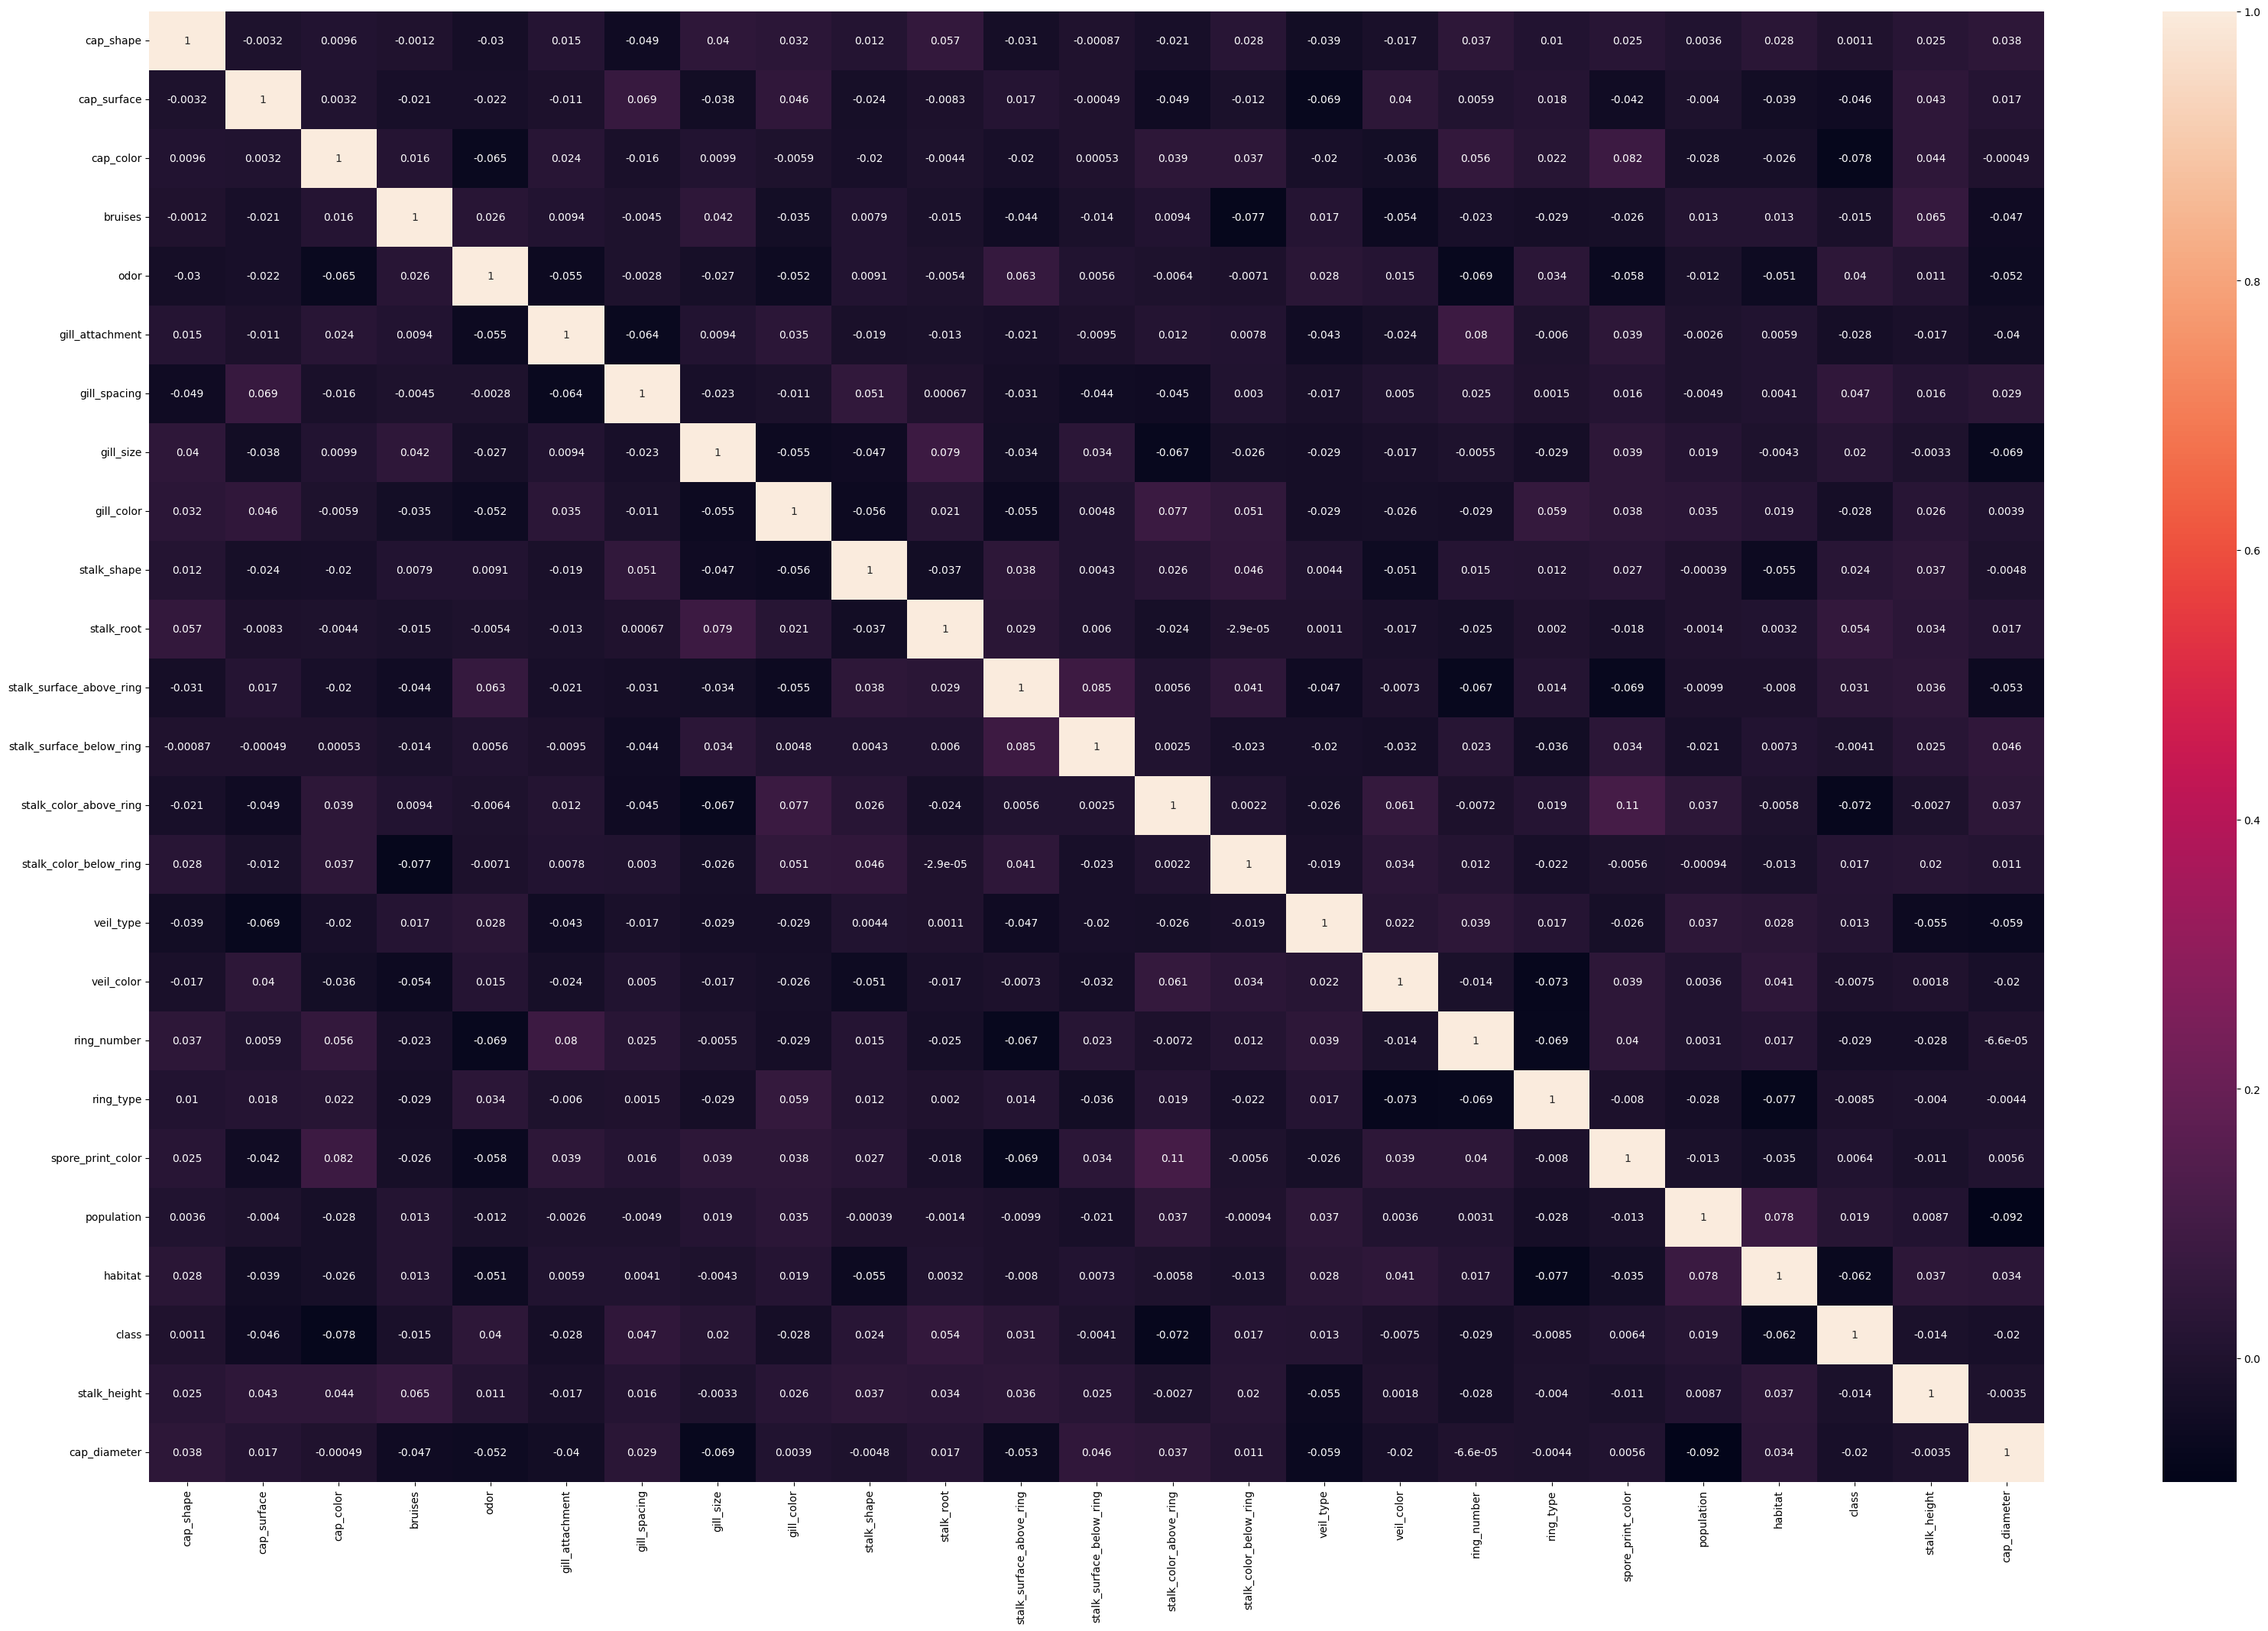

In [7]:
corr=data.corr()
plt.figure(figsize=(40,25))
sns.heatmap(corr,annot=True)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
features=data.drop('class',axis=1)
target=data['class']
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=42)
sns.pairplot(data)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

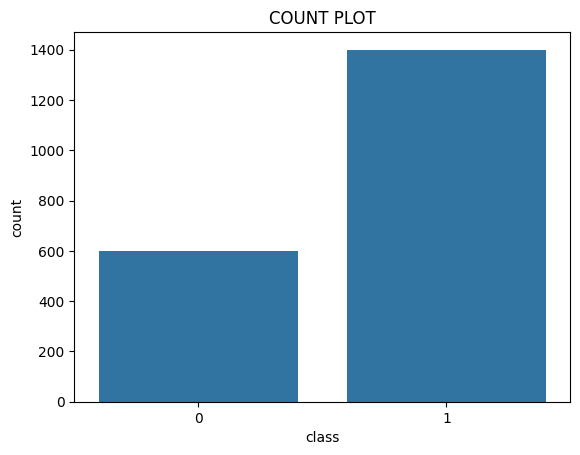

In [9]:
sns.countplot(x='class',data=data)
plt.title('COUNT PLOT')
plt.show()

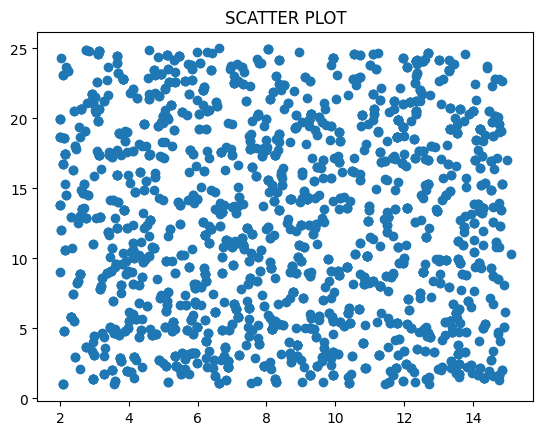

In [10]:
plt.scatter(data['stalk_height'],data['cap_diameter'])
plt.title('SCATTER PLOT')
plt.show()

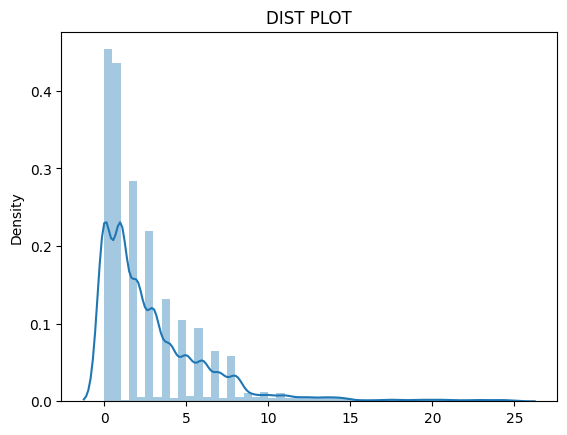

In [11]:
sns.distplot(features)
plt.title('DIST PLOT')
plt.show()

In [12]:
from sklearn import svm
from sklearn.svm import SVC
model1=SVC(kernel='linear',gamma='scale',C=5)
model1.fit(x_train,y_train)

SVC(C=5, kernel='linear')

In [13]:
ypred=model1.predict(x_test)
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix
print('Accuracy:',accuracy_score(y_test,ypred)*100)

Accuracy: 69.16666666666667


In [14]:
print(classification_report(y_test,ypred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600



In [15]:
print('F1 score:',f1_score(y_test,ypred)*100)

F1 score: 81.77339901477832


In [16]:
from sklearn.model_selection import GridSearchCV
params={
    'kernel':['rbf'],
    'gamma':['scale'],
    'C':[0.1,4,5]
}
grid=GridSearchCV(estimator=model1,param_grid=params)
grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(C=5, kernel='linear'),
             param_grid={'C': [0.1, 4, 5], 'gamma': ['scale'],
                         'kernel': ['rbf']})

In [17]:
grid.best_params_

{'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}

<Axes: >

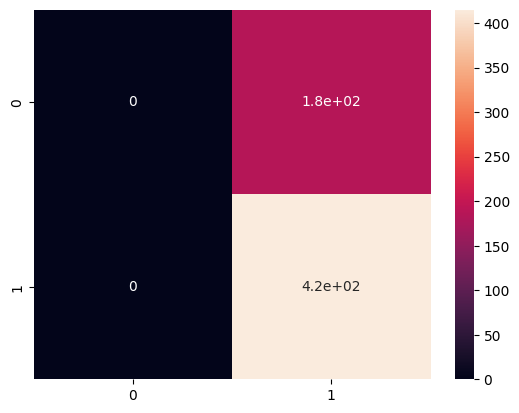

In [18]:
con=confusion_matrix(y_test,ypred)
sns.heatmap(con,annot=True)

**Discuss practical implications of SVM in real-world classification task**

SVMs are effective for:

- High-Dimensional Data: Works well in text classification or bioinformatics with many features.

- Non-Linear Decision Boundaries: Uses kernels to separate complex patterns (e.g., in medical diagnosis).

- Robustness to Overfitting: Performs well in small datasets with clear margins.

- Applications: Image recognition, fraud detection, and bioinformatics.